In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import re, wget, os
from adjustText import adjust_text
plt.style.use('ggplot')

pd.options.display.max_columns = 999
pd.options.display.max_rows = 300
np.set_printoptions(linewidth=400)
%matplotlib inline
from IPython.display import display, HTML
pd.options.mode.chained_assignment = None
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

## Read

In [2]:
players = pd.read_csv("CompleteDataset.csv",low_memory=False) #guessing dtypes for each column is very memory demanding
player_att = pd.read_csv("PlayerAttributeData.csv",low_memory=False) #to get att names easier
players.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## All Nulls seem to be GKS

In [3]:
players_nulls = players[players.isnull().any(axis=1)]
print(players_nulls['Preferred Positions'].value_counts()[:5])

GK         2029
CB           36
ST           14
LB           13
CM CDM       10
Name: Preferred Positions, dtype: int64


In [4]:
players_nulls

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,€64.5M,€215K,1458,57,38,60,43,42,64,17,21,18,13,19,90,85,87,86,90,21,30,67,51,12,13,40,12,88,50,31,13,58,40,21,64,68,13,NaN,NaN,NaN,NaN,NaN,193080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,T. Courtois,25,https://cdn.sofifa.org/48/18/players/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,92,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,€59M,€190K,1282,46,23,61,45,23,52,14,19,13,14,11,85,91,69,86,88,13,15,68,31,17,11,27,13,81,32,36,16,52,38,18,70,44,12,NaN,NaN,NaN,NaN,NaN,192119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,G. Buffon,39,https://cdn.sofifa.org/48/18/players/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,€4.5M,€110K,1335,49,38,55,49,28,70,13,20,26,15,13,89,88,74,90,84,13,28,75,35,13,10,22,12,80,37,39,11,43,39,11,69,50,17,NaN,NaN,NaN,NaN,NaN,1179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,J. Oblak,24,https://cdn.sofifa.org/48/18/players/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,88,93,Atlético Madrid,https://cdn.sofifa.org/24/18/teams/240.png,€57M,€82K,1290,43,34,67,49,16,55,13,13,12,11,14,84,90,77,87,84,15,19,76,26,12,14,11,11,84,29,22,18,60,41,12,78,55,13,NaN,NaN,NaN,NaN,NaN,200389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,29,H. Lloris,30,https://cdn.sofifa.org/48/18/players/167948.png,France,https://cdn.sofifa.org/flags/18.png,88,88,Tottenham Hotspur,https://cdn.sofifa.org/24/18/teams/18.png,€38M,€165K,1318,65,31,55,54,34,61,13,11,10,10,10,88,86,68,82,90,10,27,74,50,14,12,40,10,85,50,23,18,63,41,10,43,30,11,NaN,NaN,NaN,NaN,NaN,167948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,43,S. Handanovič,32,https://cdn.sofifa.org/48/18/players/162835.png,Slovenia,https://cdn.sofifa.org/flags/44.png,87,87,Inter,https://cdn.sofifa.org/24/18/teams/44.png,€29M,€91K,1264,54,25,42,36,24,62,12,12,18,10,14,87,86,69,87,87,10,22,78,34,19,17,23,12,83,36,22,13,57,41,10,71,41,12,NaN,NaN,NaN,NaN,NaN,162835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,68,P. Čech,35,https://cdn.sofifa.org/48/18/players/48940.png,Czech Republic,https://cdn.sofifa.org/flags/12.png,86,86,Arsenal,https://cdn.sofifa.org/24/18/teams/1.png,€10.5M,€92K,1206,40,17,49,34,22,70,19,13,12,12,19,82,87,76,83,81,19,23,51,33,11,11,23,13,84,35,21,12,44,32,13,65,53,17,NaN,NaN,NaN,NaN,NaN,48940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,74,K. Navas,30,https://cdn.sofifa.org/48/18/players/193041.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,85,85,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€24.5M,€165K

## Apply integers to position

In [5]:
players["Preferred Positions 1"] = players["Preferred Positions"].apply(lambda x: re.findall('^([\w\-]+)', x)[0]) # Get first preferred position
# if fowards 0, midfield = 1, defender = 2, GK = 3
positions_map1 = {
 'CAM': 1,
 'CB': 2,
 'CDM': 2,
 'CF': 0,
 'CM': 1,
 'GK': 3,
 'LB': 2,
 'LM': 1,
 'LW': 0,
 'LWB': 2,
 'RB': 2,
 'RM': 1,
 'RW': 0,
 'RWB': 2,
 'ST': 0}

players["Preferred Positions int"] = players["Preferred Positions 1"].replace(positions_map1)
players = players.fillna(0)
players[["Name","Preferred Positions","Preferred Positions 1","Preferred Positions int"]].head(20)

,Name,Preferred Positions,Preferred Positions 1,Preferred Positions int
0,Cristiano Ronaldo,ST LW,ST,0
1,L. Messi,RW,RW,0
2,Neymar,LW,LW,0
3,L. Suárez,ST,ST,0
4,M. Neuer,GK,GK,3
5,R. Lewandowski,ST,ST,0
6,De Gea,GK,GK,3
7,E. Hazard,LW,LW,0
8,T. Kroos,CDM CM,CDM,2
9,G. Higuaín,ST,ST,0


## ```fillna()``` toy example

In [6]:
d = pd.DataFrame({'col1': [1, np.nan, 2,5], 'col2': [30, np.nan, 20,10], 'col4': ['hi',np.nan,'you',np.nan]})
d.fillna(0)

,col1,col2,col4
0,1.0,30.0,hi
1,0.0,0.0,0
2,2.0,20.0,you
3,5.0,10.0,0


In [7]:
def get_attributes(players):
    attribute_names = player_att.columns[1:].values # all attribute names e.g. Acceleration, Aggresion, Agility etc.
    attribute_names = attribute_names[attribute_names!="ID"] # remove id not interested
    attributes = players[attribute_names] #get 
    attributes = attributes.apply(pd.to_numeric, errors='coerce', axis=0) #invalid parsing will be set as NaN
    attributes = attributes.fillna(0)
    return attributes

attributes = get_attributes(players)
position_col = players["Preferred Positions int"] # for coloring plot
attributes

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
0,89.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,76.0,7.0,11.0,15.0,14.0,11.0,88.0,29.0,95.0,77.0,92.0,22.0,85.0,95.0,96.0,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0
1,92.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,90.0,6.0,11.0,15.0,14.0,8.0,71.0,22.0,68.0,87.0,88.0,13.0,74.0,93.0,95.0,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0
2,94.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,84.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,61.0,75.0,77.0,21.0,81.0,90.0,88.0,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0
3,88.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,84.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,69.0,64.0,86.0,30.0,85.0,92.0,93.0,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0
4,58.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,11.0,91.0,90.0,95.0,91.0,89.0,25.0,30.0,78.0,59.0,16.0,10.0,47.0,12.0,85.0,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0
5,79.0,80.0,78.0,80.0,89.0,87.0,62.0,77.0,85.0,91.0,84.0,15.0,6.0,12.0,8.0,10.0,85.0,39.0,84.0,65.0,83.0,25.0,81.0,91.0,91.0,83.0,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0
6,57.0,38.0,60.0,43.0,42.0,64.0,17.0,21.0,18.0,13.0,19.0,90.0,85.0,87.0,86.0,90.0,21.0,30.0,67.0,51.0,12.0,13.0,40.0,12.0,88.0,50.0,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0
7,93.0,54.0,93.0,91.0,92.0,87.0,80.0,82.0,93.0,83.0,79.0,11.0,12.0,6.0,8.0,8.0,57.0,41.0,59.0,81.0,82.0,25.0,86.0,85.0,85.0,86.0,79.0,22.0,87.0,79.0,27.0,65.0,86.0,79.0
8,60.0,60.0,71.0,69.0,89.0,85.0,85.0,85.0,79.0,76.0,84.0,10.0,11.0,13.0,7.0,10.0,54.0,85.0,32.0,93.0,90.0,63.0,73.0,79.0,86.0,90.0,87.0,69.0,52.0,77.0,82.0,74.0,88.0,82.0
9,78.0,50.0,75.0,69.0,85.0,86.0,68.0,74.0,84.0,91.0,62.0,5.0,12.0,7.0,5.0,10.0,86.0,20.0,79.0,59.0,82.0,12.0,70.0,92.0,88.0,75.0,88.0,18.0,80.0,72.0,22.0,85.0,70.0,88.0


In [8]:
def dim_reduction(x):
    dim_reduce = PCA(n_components=2) #dim reduction
    dim_reduce_fit = dim_reduce.fit_transform(x) 
    return dim_reduce, dim_reduce_fit

def biplot(dim_reduce,coeff,labels=None,color="blue",alpha=0.5):
    fig, ax = plt.subplots(figsize=(20,20))
    xs = dim_reduce[:,0]
    ys = dim_reduce[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #scalex = scaley = 1
    cax = ax.scatter(xs*scalex,ys*scaley,c = color,alpha=0.35)
    arrow_scale = 1.0
    annotations = []
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0]*arrow_scale, coeff[i,1]*arrow_scale,color = 'red',linestyle="-",alpha=0.5)
        annotations.append(ax.text(coeff[i,0]*arrow_scale, coeff[i,1]*arrow_scale, labels[i], color = 'black', ha = 'left', va = 'top',fontsize=15))
    adjust_text(annotations)
    ax.set_xlabel("First component")
    ax.set_ylabel("Second component")
    return fig,cax

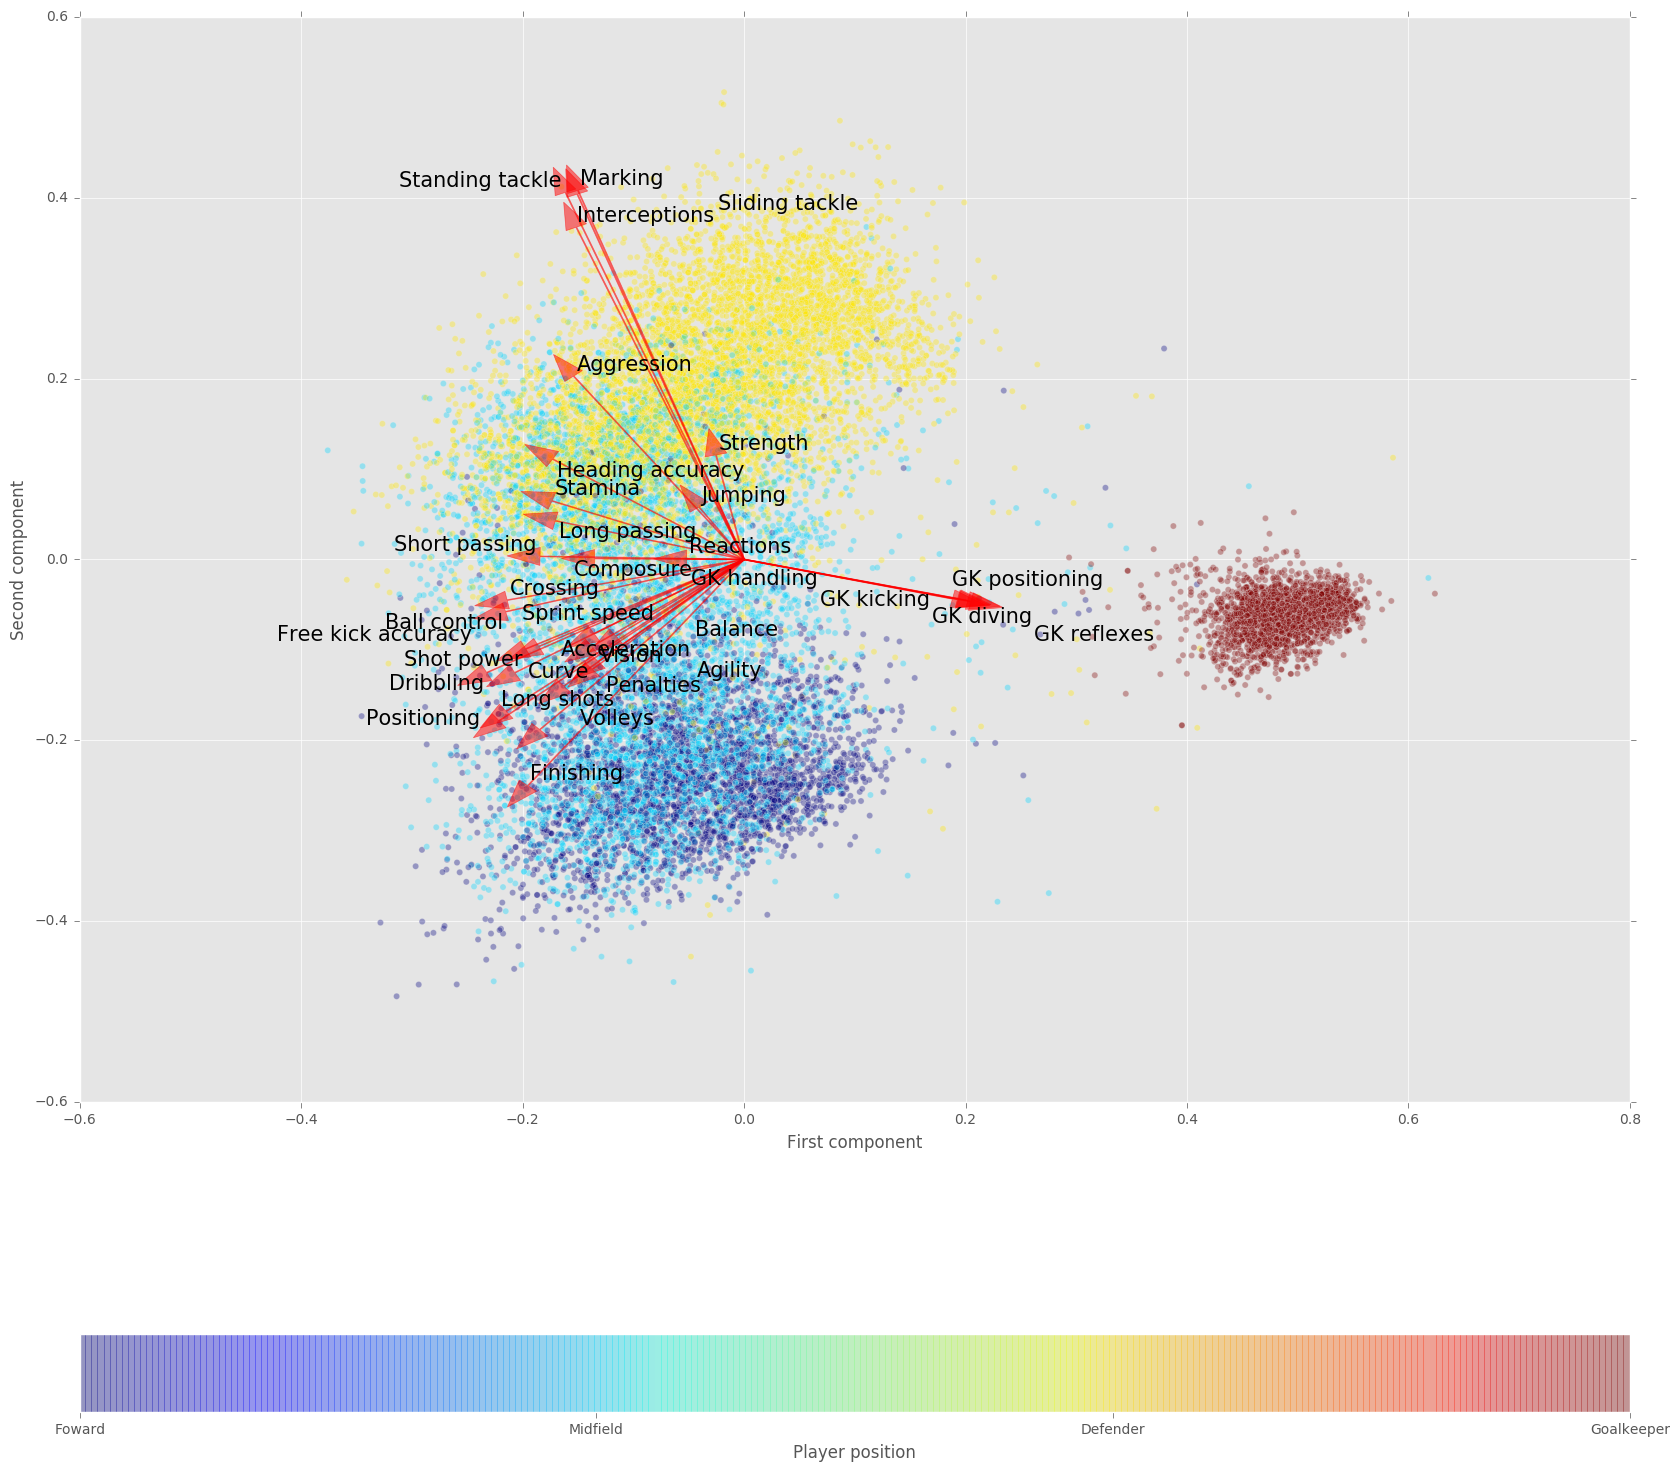

In [9]:
dim_reduce, dim_reduce_fit = dim_reduction(attributes)
fig,cax = biplot(dim_reduce_fit,np.transpose(dim_reduce.components_[0:2, :]),labels= attributes.columns.values,color=position_col)
cbar = fig.colorbar(cax, ticks=[0,1,2,3], orientation='horizontal')
cbar.ax.set_xticklabels(['Foward','Midfield','Defender',"Goalkeeper"])  # horizontal colorbar
cbar.set_label("Player position")
plt.savefig("fifa_by_position.png")
plt.show()

# Remove GoalKeepers and look at log wages

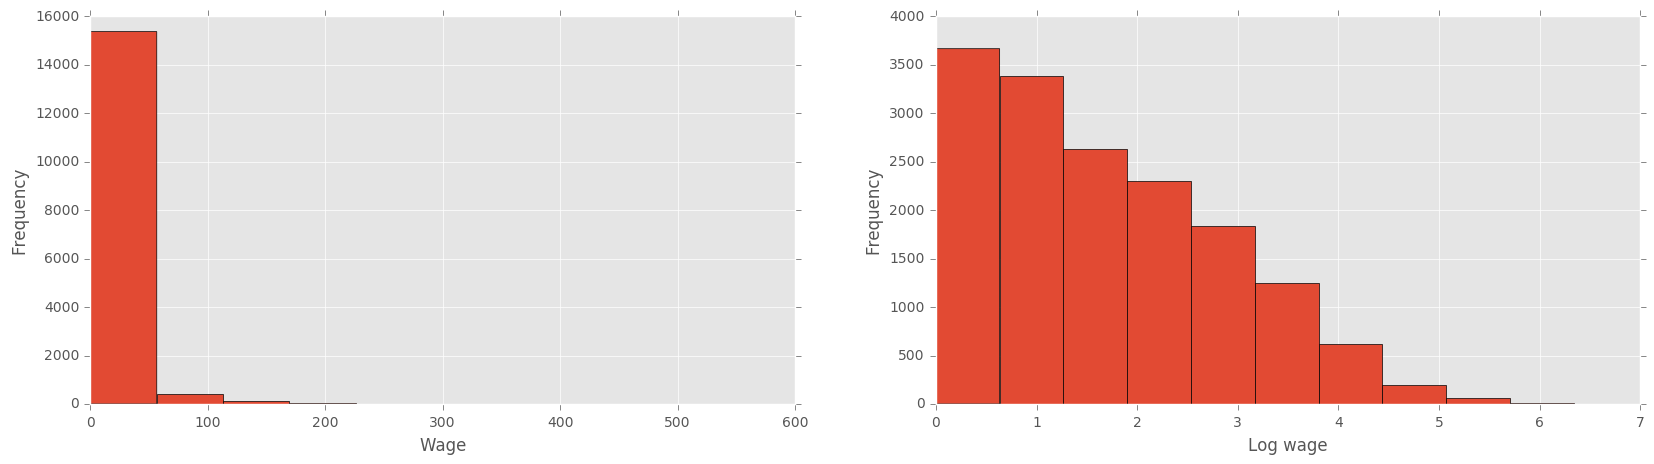

In [ ]:
no_gks = players.loc[players["Preferred Positions 1"]!="GK"] # remove gks
no_gks["Wage"] = no_gks["Wage"].replace('[\€K,]', '', regex=True).astype(float) # regex to get wage as float
no_gks["Wage log"] = no_gks["Wage"].apply(np.log) #log wages
no_gks["Wage log"] = no_gks["Wage log"].fillna(0)
no_gks["Wage log"][np.isinf(no_gks["Wage log"])] = 0 #some people have negative wages :S. set them to zero
attributes = get_attributes(no_gks)
dim_reduce, dim_reduce_fit = dim_reduction(attributes)
wage_col = no_gks["Wage log"]
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(20,5)) #histograms
ax1.hist(no_gks["Wage"],bins=10,edgecolor = "k"); ax1.set_xlabel("Wage"); ax1.set_ylabel("Frequency");
ax2.hist(no_gks["Wage log"],bins=10,edgecolor = "k"); ax2.set_ylabel("Frequency"); ax2.set_xlabel("Log wage")
plt.show()

In [ ]:
fig, cax = biplot(dim_reduce_fit,np.transpose(dim_reduce.components_[0:2, :]),labels=attributes.columns.values,color=wage_col,alpha=0.9)
ticks = np.linspace(0,wage_col.max(),10)
cbar = fig.colorbar(cax, ticks=ticks)
cbar.ax.set_yticklabels(np.exp(ticks).round())  # vertically oriented colorbar
cbar.set_label("Player log wage")
plt.savefig("fifa_by_lwage.png")
plt.show()